# Phase 1 Milestone 2


# I - Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

> Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1

### Assignment Objectives

> Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

 - Mampu memahami konsep supervised learning dan unsupervised learning
 - Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
 - Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
 -   Mampu melakukan evaluasi model
 -   Mampu melakukan model tuning
 -   Mampu melakukan model deployment


* Nama        : Muhamad Ivan

* Batch       : FTDS-013

* Dataset     : Data Science Job Salaries - Salaries of jobs in the Data Science domain (https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)
* Objective   : Membuat Model yang dapat mempredksi gaji seorang Data Scientist

### Problem
> Silakan memilih topik Milestones 2 antara Regression, Classification, atau Clustering.
> Ketentuan Dataset

- Pilihlah dataset yang paling nyaman digunakan karena tidak ada batasan untuk memilih dataset dalam mengerjakan Milestones 2.

- Konsultasikan terlebih dahulu dataset yang hendak digunakan ke buddy masing-masing student. Jika disetujui, maka silakan d-ikerjakan. Jika tidak disetujui, maka cari dataset yang lain dan konsultasikan lagi mengenai dataset yang baru ini.

- Student tidak boleh menggunakan dataset yang sudah dipakai dalam tugas Live Code, Graded Challenge, Non Graded Challenge, dan Milestone dari Phase 0 hingga Phase 1.

-  Student juga tidak boleh menggunakan dataset yang sudah dipakai dalam sesi pembelajaran saat dikelas bersama instruktur. Carilah dataset yang baru untuk tugas Milestone 2 ini.

 -   Student dilarang untuk melakukan scraping dataset karena dikhawatirkan proses pembuatan scraper dan proses scraping akan memakan waktu. Gunakan public dataset yang tersedia diberbagai macam situs Internet.

# II - Import Libraries


> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# III - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset

df = pd.read_csv('ds_salaries.csv')
pd.set_option("display.max.columns",None) # digunakan untuk menampilkan keseluruhan kolom pada dataset
pd.set_option('display.max_row', 20)


In [3]:
# Menampilkan Head
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Menampilkan Tail
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
# Duplikasi dataset
df_copy = df.copy()

In [6]:
# Menampilkan Jumlah Column dan Row
df.shape

(607, 12)

In [7]:
# Menampilkan jumlah Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


***Pengertian* tiap-tiap kolom**

!![informasi](informasi_kolom.png)

In [8]:
# Melihat gambaran  terkait dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


***Informasi* Statistik Deskriptif**
Diketahui dataset memiliki 12 kolom yang membahas mengenai gaji para data scientist dengan berbagai jabatan di berbagai negara. Berikut informasi yang dapat diambil dari data ini:
- Terdapat 5 column interger dan 7 column object yang menandakan terdapat 5 kolom numerik dan 7 kolom kategorik
- Dataset ini memiliki 607 row.
- Tidak ditemukan missing value pada dataset ini.
- Secara umum dataset ini berisi properties dari suatu jabatan data scientist seperti asal negara, pengalaman kerja, besarnya perusahaan, jabatan lebih spesifik dari data scientist.
- Pembahasan mengenai data akan dibahas lebih dalam pada EDA.
- Berdasarkan data statistik deskriptif ini column `salary` & `salary_in_usd` diasumsikan memiliki satuan per 1 tahun. Jadi angka yang tertera tersebut merupakan gaji seorang data scientist per tahun.
    - Pada column `salary_in_usd` diketahui nilai minimal gaji Data Scientist sebesar 2859 USD/tahun dan nilai maksimum sebesar 600.000 USD/Tahun dengan median sebesar 112.300 USD/Tahun.


# IV - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


## ***A. EDA* *(Pie Chart)***

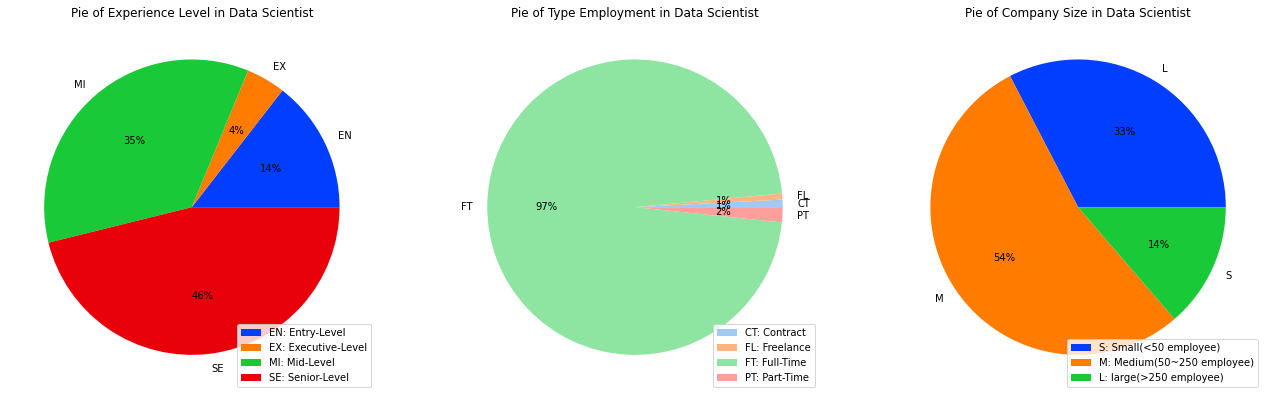

In [9]:
# Pie Chart

plt.figure(figsize=(22.5, 10.5),facecolor='white')
plt.subplot(1, 3, 1)
ax= df.groupby(by=['experience_level'])[['work_year']].count()
colors = sns.color_palette('bright')
plt.pie(ax['work_year'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(['EN: Entry-Level','EX: Executive-Level','MI: Mid-Level','SE: Senior-Level'],loc='lower right')
plt.title('Pie of Experience Level in Data Scientist')

plt.subplot(1, 3, 2)
ax= df.groupby(by=['employment_type'])[['work_year']].count()
colors = sns.color_palette('pastel')
plt.pie(ax['work_year'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(['CT: Contract','FL: Freelance','FT: Full-Time','PT: Part-Time'],loc='lower right')
plt.title('Pie of Type Employment in Data Scientist')

plt.subplot(1, 3, 3)
ax= df.groupby(by=['company_size'])[['work_year']].count()
colors = sns.color_palette('bright')
plt.pie(ax['work_year'], labels = ax.index, colors = colors, autopct='%.0f%%')
plt.legend(['S: Small(<50 employee)','M: Medium(50~250 employee)','L: large(>250 employee)'],loc='lower right')
plt.title('Pie of Company Size in Data Scientist')

plt.show()

> Insight:
1. **Pie of Experience Level In Data Scientist**: Pie ini memberikan informasi kepada kita bahwa jumlah senior level di data ini paling banyak yaitu 46%. Kemudian diikuti secara berturut-turut yaitu Mid-level(35%), Entry-level(14%), dan Executive-level(4%). 
 ` `
 
2. **Pie of Type Employment In Data Scientist**: diketahui mayoritas data scientist status karyawannya adalah full-time(permanen) dengan 97%. Sedangkan untuk status lainnya seperti kontrak(1%), part-time(2%), dan freelance(1%).
3. **Pie of Company Size In Data Scientist**: diketahui perusahaan yang mempekerjakan profesi data scientist dan turunannya paling banyak pada perusahaan kategori medium dengan persentase 54%. Sedangkan perusahaan small sebesar 33% dan large sebesar 14%.

Text(0.5, 1.0, 'Pie of Job Title & Position in Data Scientist')

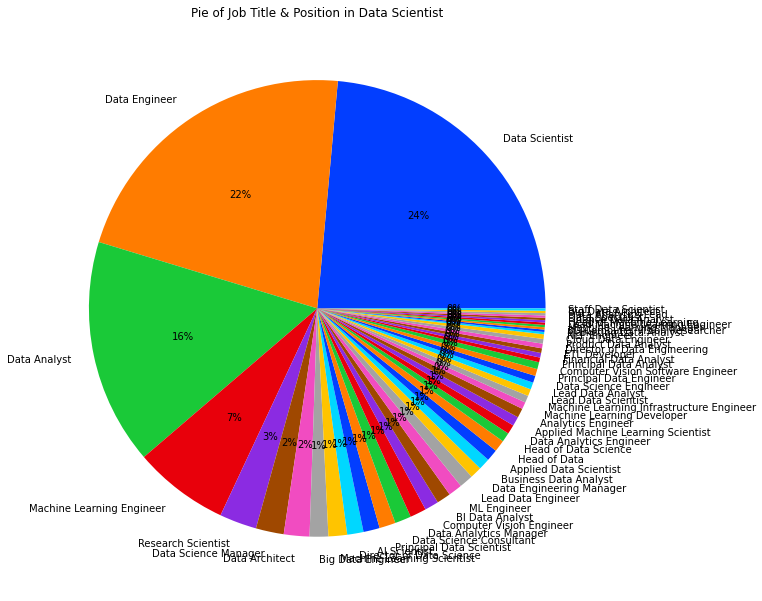

In [10]:
# Pie Chart
plt.figure(figsize=(22.5, 10.5),facecolor='white')
ax= df.groupby(by=['job_title'])[['work_year']].count()
colors = sns.color_palette('bright')
plt.pie(ax['work_year'].sort_values(ascending=False), labels = ax['work_year'].sort_values(ascending=False).index, colors = colors, autopct='%.0f%%')
plt.title('Pie of Job Title & Position in Data Scientist')

> Insight:
1. Berdasarkan grafik diketahui 5 posisi yang paling banyak dimiliki oleh para data scientist dan turunannya berturut-turut yaitu: Data Scientist `(24%)`, Data Engineer `(22%)`, Data Analyst `(16%)`, Machine Learning Engineer `(7%)`, dan Research Scientist `(3%)`. 
2. Sedangkan untuk 28% sisanya dibagi kedalam 45 posisi turunan pekerjaan data scientist.

## ***B. EDA* *(Histogram)***

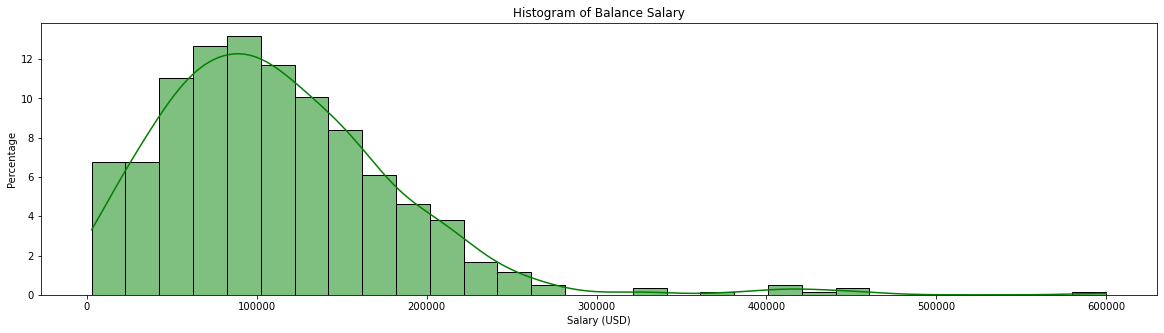

In [11]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Balance Salary')
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='green', element='bars',stat='percent')
plt.xlabel('Salary (USD)')
plt.ylabel('Percentage')

plt.show()

> Insight:
1. Diketahui pendapat seorang data scientist umumnya adalah berkisar 90.000 USD ~ 100.000 USD. Data Scientist dengan pendapatan kisaran ini jumlahnya sebanyak 13% dari total dataset.
2. Berdasarkan grafik jumlah orang yang memiliki pendapatan di atas 100.000 USD akan menurun secara teratur hingga mencapai gaji 280.000 USD.
3. Pendapatan di atas 280.000 USD hanya diisi oleh posisi-posisi tertentu yang jumlahnya masing-masing kurang dari 1%.

Text(0, 0.5, 'Number of Jobs')

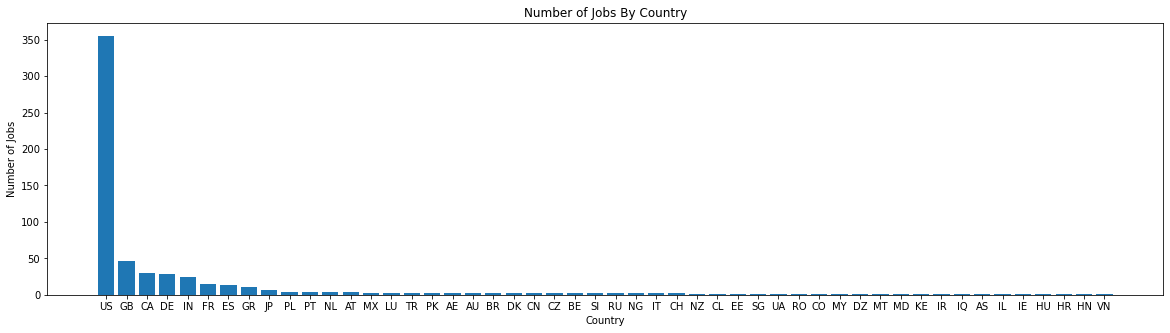

In [12]:
plt.figure(figsize=(20,5))
ax_df=df.groupby(by='company_location').count()[['company_size']].sort_values(by='company_size',ascending=False)
plt.title('Number of Jobs By Country')
plt.bar(data=ax_df, x=ax_df.index, height='company_size')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')


> Insight:
1. Amerika adalah negara dengan pekerjaan Data Scientist terbanyak menurut dataset yang tersedia. Tentu ini berbanding lurus dengan kebutuhan Data Scientist di negara terebut.
2. Banyaknya data scientist di Amerika dapat disebabkan karena telah berkembangnya pekerjaan yang merupakan turunan data scientist.
3. Sebanyak 350 dari 607 pekerjaan Data Scientist yang ada di dataset berlokasi di Amerika. Dilanjutkan pada posisi 2 sebanyak 47.

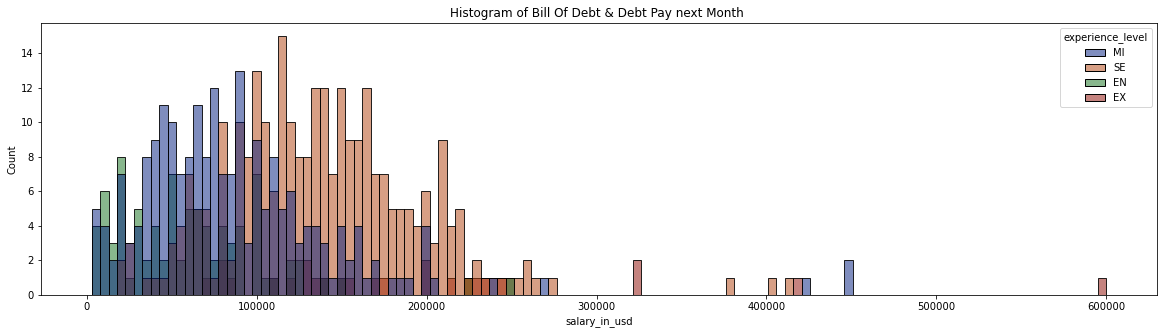

In [13]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(20, 5))
sns.histplot(data=df,x=df['salary_in_usd'],hue=df['experience_level'], bins=120, kde=False,palette="dark")
plt.title('Histogram of Bill Of Debt & Debt Pay next Month ')

plt.show()

> Insight:
1. Diketahui gaji tertiggi sebesar 600.000 USD/Tahun didapatkan oleh pekerja dengan experience level `Executive Level`
2. Pekerjaan dengan gaji rendah di dominasi oleh `Entry level` walaupun juga terdapat Medium level
3. Pekerjaan dengan gaji berkisar 35.000 ~ 100.000 didominasi oleh `Medium level`
4. Sedangkan gaji kisaran 100.000 USD ~ 250.000 USD didominasi oleh karyawan dengan level pengalaman `senior level`
5. Hal ini sesuai dengan kenyataan lapangan bahwa semakin tinggi kualifikasi dan pengalaman, semakin tinggi pula pendapatan.

Text(0, 0.5, 'Count of Salary')

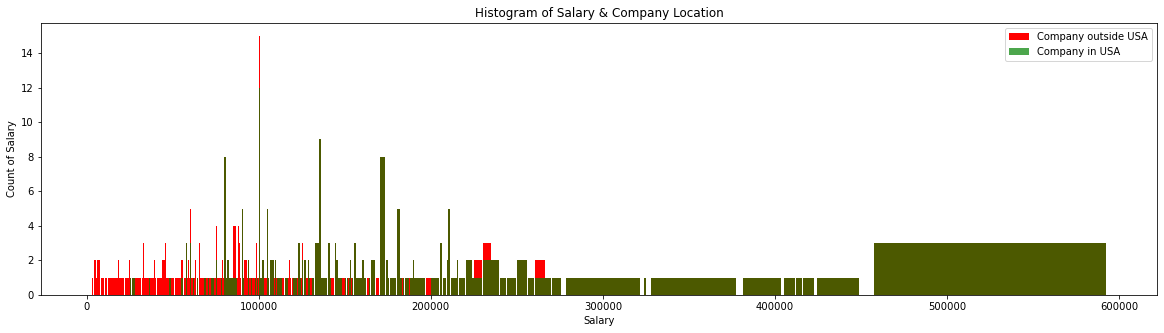

In [14]:
plt.figure(figsize=(20,5))
plt.title('Histogram of Salary & Company Location')
plt.hist(df['salary_in_usd'], sorted(df['salary_in_usd'].unique()),rwidth=0.9, color ='red')
plt.hist(df['salary_in_usd'][(df['company_location']=='US')], sorted(df['salary_in_usd'].unique()),rwidth=0.9,color='green',alpha = 0.7)
plt.legend(['Company outside USA', 'Company in USA'],loc='upper right')
plt.xlabel('Salary')
plt.ylabel('Count of Salary')

> Insight:
1. Dari grafik diketahui Data Scientist dengan gaji-gaji besar yaitu > 100.000 USD kebanyakan merupakan perusahaan yang berlokasi di Amerika
2. Hal ini sesuai dengan grafik sebelumnya yang mengatakan 350 dari 607 pekerjaan Data Scientist berlokasi di Amerika.
3. Amerika sebagai mata uang dunia dan salah satu negara maju tentu memiliki standar hidup yang tinggi sehingga mempengaruhi pendapatannya pula.

## ***C. EDA* *(Scatterplot)***

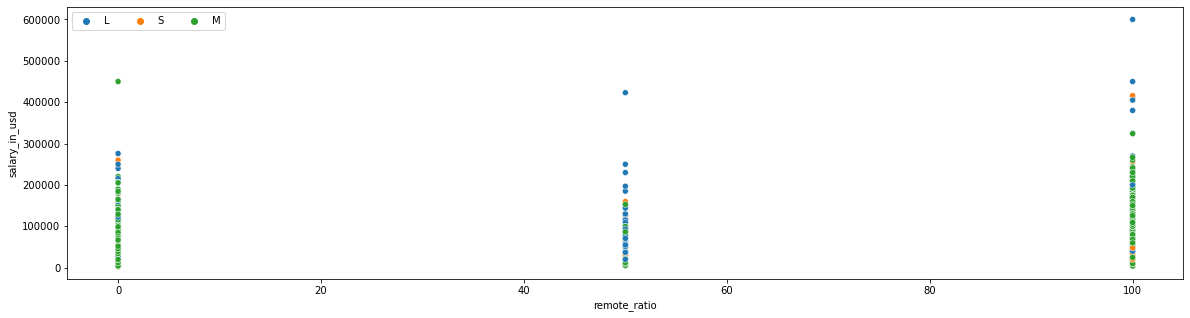

In [15]:
plt.figure(figsize=(20, 5),frameon=True)
sns.scatterplot(data=df, x="remote_ratio", y='salary_in_usd',hue='company_size')
plt.legend( loc ="upper left",ncol=9)

> Insight:
1. Diketahui karyawan yang bekerja 100% di kantor relatif memiliki gaji lebih tinggi dibandingkan karyawan yang 100% bekerja remote.
2. Hal ini tentu sesuai dengan logika dimana ketika orang bekerja di kantor akan banyak pengeluaran seperti transportasi dan bensin, sehingga wajar dikompensasikan dengan gaji yang lebih besar.
3. Dari grafik diketahui pula bahwa perusahaan large memberikan gaji lebih besar dibandingkan perusahaan medium. Hal ini terlihat pada remote raio 50 dan 100 dimana gaji tertinggi berasal dari perusahaan Large.

## ***D. EDA* *(Heatmap)***

<AxesSubplot:>

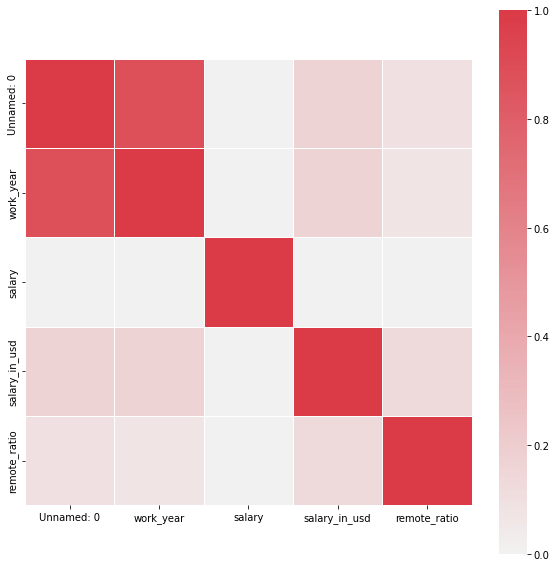

In [16]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

> Insight:
1. Berdasarkan grafik diketahui terdapat hubungan yang erat antara work_year dengan Unnamed: 0. Namun penulis mengetahui bahwa column Unnamed: 0 adalah nomor urut. Sehingga terdapat korelasi yang baik antara work_year dengan Unnamed: 0 adalah sebuah kebetulan.
2. Pada tahap selanjutnya perlu dibuang column Unnamed: 0 karena hanya berisi nomor urut.
3. Kolom selain Unnamed: 0 akan dipertahankan untuk dilakukan modeling.

# V - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## **A. Feature Selection I**

In [17]:
# Drop Column yang korelasinya tidak signifikan

df.drop(columns=['Unnamed: 0','salary','salary_currency'],inplace=True)

> Alasan Drop:
- Drop Column `Unnamed: 0` karena hanya berisi nomor urut
- Drop Column `salary` dan `salary_currency` karena gaji sudah dapat diwakili dengan kolom `salary_in_usd` 

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [19]:
df= df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio',
       'company_location', 'company_size','salary_in_usd']]


In [20]:
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

> Catatan:
1. Dilakukan drop terhadap column `Unnamed: 0`, `salary`, dan `salary_currency`
2. Dilakukan rename terhadap column `salary_in_usd` menjadi `salary` untuk mempermudah penulisan
3. Dilakukan pengaturan ulang tata letak column untuk mempermudah pengelihatan dengan memindahkan kolom `salary` ke ujung kanan

## **B. Handling Missing Values**

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df.head()

,column_name,percent_missing
work_year,work_year,0.0
experience_level,experience_level,0.0
employment_type,employment_type,0.0
job_title,job_title,0.0
employee_residence,employee_residence,0.0


> Catatan:
1. Tidak ditemukan adanya missing value

## **C. Get Data for Model Inference**

In [22]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=26)
df_inf.shape

(10, 9)

` mengambil 10 data untuk menjadi model inference atau dataset baru `

In [23]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)
df_train_test.shape

(597, 9)

` Membuang 10 row data yang dijadikan inference dari dataset keseluruhan `

In [24]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,2021,SE,FT,Principal Data Scientist,US,0,US,L,220000
1,2022,SE,FT,Data Scientist,US,0,US,M,140400
2,2021,MI,FT,Data Scientist,CA,100,CA,L,75774
3,2022,SE,FT,Data Analyst,US,0,US,M,164000
4,2022,MI,FT,Data Engineer,ES,100,ES,M,76940
5,2021,MI,FT,Data Scientist,DE,50,DE,L,90734
6,2022,MI,FT,Data Scientist,US,100,US,M,200000
7,2020,EN,FT,Data Scientist,US,100,US,S,105000
8,2022,SE,FT,Data Scientist,GB,0,GB,M,117789
9,2021,SE,FT,Data Analyst,CA,100,CA,M,71786


` dilakukan reset index untuk menyamakan index akibat dari 10 row yang diambil `

## **D. *Splitting Dataset***

In [25]:
df_train_test.head(1)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,2020,MI,FT,Data Scientist,DE,0,DE,L,79833


In [26]:
# Split between `X` (Features) and `y` (Target)

X = df_train_test.drop('salary', axis=1)
y = df_train_test['salary']
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Engineer,US,100,US,M
593,2022,SE,FT,Data Engineer,US,100,US,M
594,2022,SE,FT,Data Analyst,US,0,US,M
595,2022,SE,FT,Data Analyst,US,100,US,M


In [27]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (477, 8)
Test Size  :  (120, 8)


> Catatan:
1. Dilakukan drop terhadap column `salary` karena tujuan dari permodelan ini adalah melakukan prediksi terhadap gaji data scientist. Sehingga column `salary` dijadikan kolom target.
2. Kemudian dilakukan split terhadap data, sehingga menjadi data Train dan data Test. Pada data Train terdapat (477 row dan 8 column). Kemudian pada data Test terdapat (120 row dan 8 column).

## **E. *Handling Outlier***

In [28]:
pd.DataFrame(X_train.skew(numeric_only=True),columns=['Skewness'])

,Skewness
work_year,-0.697115
remote_ratio,-0.897626


> Catatan:
1. Diketahui dari data diatas terdapat 2 column numerik yang dapat dikategorikan Skew karena memiliki gradeness of skew  <-0.5 sehingga harus dilakukan scaling dengan MinMaxScaler. 
2. Penulis tidak ingin menggunakan metode Trimming karena data dari dataset ini sudah cukup sedikit. Ditakutkan training tidak maksimal jika dikurangi.
3. Kemudian tidak dilakukan windsorizer(capping) karena penulis yakin bahwa outlier pada dataset ini adalah natural. Outlier natural yang berasal dari gaji para Data Scientist di negara Amerika.

## **F. *Feature Scaling & Encoding***

In [29]:
X_train.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
588,2022,MI,FT,Data Scientist,US,100,US,M
280,2021,SE,FT,Data Science Manager,IN,50,IN,L
154,2021,MI,FT,Applied Machine Learning Scientist,US,50,US,L
225,2021,EN,FT,Big Data Engineer,IN,100,IN,L
564,2022,SE,FT,Data Scientist,US,100,US,M


> catatan:
1. Pada kasus ini akan digunakan `metode pipeline`, oleh karena itu proses scaling dan encoding akan dilakukan pada tahap Model Definition bersamaan dengan pendefinisian model training yang akan digunakan.

# VI - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

#### **a. Pipeline Preprocessing**

In [30]:
X_train.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
588,2022,MI,FT,Data Scientist,US,100,US,M
280,2021,SE,FT,Data Science Manager,IN,50,IN,L
154,2021,MI,FT,Applied Machine Learning Scientist,US,50,US,L
225,2021,EN,FT,Big Data Engineer,IN,100,IN,L
564,2022,SE,FT,Data Scientist,US,100,US,M


In [31]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan scalling
numeric_features_mc = ['work_year','remote_ratio']
numeric_pipeline = Pipeline([("scaler1", MinMaxScaler())])


In [32]:
# Mengelompokan masing-masing kolom untuk perlakuan preprocessing terutama pada tahapan Encoding
cat_features_oe = ['experience_level','employment_type','company_size']
cat_features_he = ['job_title','employee_residence','company_location']

full_pipeline = ColumnTransformer([
        ("num", numeric_pipeline, numeric_features_mc),
        ("cat1", OneHotEncoder(handle_unknown='ignore'), cat_features_he),
        ("cat2",OrdinalEncoder(categories=[['EN','MI','SE','EX'],
                                    ['FL','PT','CT','FT'], 
                                    ['S','M','L']],handle_unknown='use_encoded_value',unknown_value=np.nan ),cat_features_oe)
])                                      


> Keterangan:
1. Kolom `work_year` dan `remote_ratio` dibuatkan pipeline dengan nama numeric_pipeline yang akan di transform dengan MinMaxScaler karena distribusi tidak normal.
2. Kolom kategori dibagi dua yaitu cat_features_oe yang akan di encode menggunakan OrdinalEncoder dan cat_features_he yang akan di encode menggunakan OneHotEncoder. 
3. Pada variabel full_pipeline dibuatkan satu paket fungsi yang dapat menyelesaikan seluruh permasalahan preprocessing, sehingga dapat segera di train.

#### **b. Pipeline Modelling**

In [33]:
# Linear Regression Pipeline
linear_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', LinearRegression())])
# Lasso Regression Pipeline
Lasso_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', Lasso())])
# Ridge Regression Pipeline
Ridge_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', Ridge())])
# Decision Tree Regressor (DTR) Pipeline
tree_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', DecisionTreeRegressor())])
# Support Vector Reggresor (SVR) Pipeline
svr_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', SVR())])

> Keterangan:
1. Dibuatkan 5 variabel baru yang berisi gabungan pipeline prepocessing dan model-model yang akan di uji coba kan kepada dataset.
2. Pada kasus ini akan diuji coba 5 Model Regresi yaitu, `Linear Regression`, `Lasso Regression`, `Ridge Regression`, `Decision Tree Regresor`, dan `SVR`. Pemilihan 5 model itu dikarenakan target yang akan kita cari ada numerik. Oleh karena itu model-model pilihan kita adalah yang mampu melakukan regresi.
3. Pada Training awal dan model definisi awal digunakan hyperparameter default.
4. Kemudian Metrik Evaluasi akan digunakan `Mean Absolut Error(MAE)`. MAE dipilih karena metrik evaluasi ini tidak terlalu sensitif terhadap outlier. Hal ini sejalan dengan dataset yang digunakan yaitu terdapat 2 column yang memiliki outlier dan distribusinya tidak normal.


# VII - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### **a. Model Training dengan Pipeline**

In [34]:
# Linear Regression Training
linear_pipe.fit(X_train,y_train)
# Linear Regression Training
Lasso_pipe.fit(X_train,y_train)
# Linear Regression Training
Ridge_pipe.fit(X_train,y_train)
# Linear Regression Training
tree_pipe.fit(X_train,y_train)
# Linear Regression Training
svr_pipe.fit(X_train,y_train)

c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85351712037.58405, tolerance: 262782679.0280302
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler1',
                                                                   MinMaxScaler())]),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title',
                                                   'employee_residence',
                                                   'company_location']),
                                                 ('cat2',
                                                  OrdinalEncoder(categories=[['EN',
                                                                              'MI',
                                                                              'SE',
                                                                              'EX'],
                                                                             ['FL',
                                                                              'PT',
                                                                              'CT',
                                                                              'FT'],
                                                                             ['S',
                                                                              'M',
                                                                              'L']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'company_size'])])),
                ('classifier', SVR())])

> Keterangan:
1. Dilakukan train kepada seluruh model yang telah dibungkus pipeline

#### **b. Scoring Model dengan Cross-Validation**

In [35]:
scores1 = cross_val_score(linear_pipe, X_train, y_train,scoring="neg_mean_absolute_error", cv=10)
scores2 = cross_val_score(Lasso_pipe, X_train, y_train,scoring="neg_mean_absolute_error", cv=10)
scores3 = cross_val_score(Ridge_pipe, X_train, y_train,scoring="neg_mean_absolute_error", cv=10)
scores4 = cross_val_score(tree_pipe, X_train, y_train,scoring="neg_mean_absolute_error", cv=10)
scores5 = cross_val_score(svr_pipe, X_train, y_train,scoring="neg_mean_absolute_error", cv=10)

c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76666096284.70264, tolerance: 212156858.58461452
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74806781591.43274, tolerance: 232166371.332621
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17370454964.90326, tolerance: 227656614.52405784
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

In [36]:
# Melakukan looping untuk membaut Dataframes yang berisi SCORE MAE & Standar Deviasi
model_name = [scores1,scores2,scores3,scores4,scores5]
label = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor',' SVR']

Cross_Validation = pd.DataFrame(columns=['Model','scores mean', 'scores std', 'scores mean + 2 scores std', 'scores mean - 2 x scores std'])
a = 0
for i in model_name:
    Cross_Validation.loc[a] = [label[a],round(-i.mean(),2), round(i.std(),2), round(-i.mean()+2*i.std(),2), round(-i.mean()-2*i.std(),2)]
    a=a+1 
Cross_Validation.sort_values(by='scores mean', ascending=True).reset_index(drop=True)

,Model,scores mean,scores std,scores mean + 2 scores std,scores mean - 2 x scores std
0,Ridge Regression,37694.47,5972.33,49639.14,25749.81
1,Decision Tree Regressor,39759.29,7303.38,54366.06,25152.52
2,Lasso Regression,43310.99,7043.60,57398.19,29223.78
3,Linear Regression,44183.95,7158.70,58501.35,29866.54
4,SVR,53303.51,6847.38,66998.27,39608.75


> Keterangan:
1. Penentuan model terbaik dilakukan dengan melihat score terbaik berdasarkan hasil evaluasi Cross Validation.
2. Setiap model dilakukan cross validation dan dicari Score CV-nya masing-masing
3. Kemudian dibuatkan dataframe yang berisi rangkuman penilaian ke 5 model yang dijalankan.
4. Kriteria model terbaik adalah Scores Mean  dan Scores STD sekecil mungkin. 
    - Pada tahap pertama penulis mengambil 3 model dengan std terkecil yaitu Ridge, Decision Tree, dan SVR.
    - Tahap kedua penulis memilih dari 3 model itu, scores mean terkecil.
    - `Didapatkan Ridge Regression memberikan nilai Mean dan STD terkecil` dibandingkan 4 model lainnya
5. Dengan Confidence Interval 95% Ridge Regression `memiliki range nilai 25750 - 49650`
6. Oleh karena itu pada tahap Hyperparameter Tuning akan digunakan model Ridge Regressions

#### **C. Hyperparameter Tuning Ridge Regression**

In [37]:
# Grid Search Ridge Regression Hyperparameter Tuning
Ridge_pipe = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', Ridge())])

In [38]:
X_train_final = full_pipeline.fit_transform(X_train)

In [39]:
params_Ridge = {'alpha': [20,10,1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(Ridge(), param_grid=params_Ridge, n_jobs=-1,scoring="neg_mean_absolute_error",cv=10)
Ridge_GS.fit(X_train_final,y_train)

c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\Users\ASUS TUF\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 821, in fit
    raise ValueError(
ValueError: s

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [20, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_mean_absolute_error')

In [40]:
Ridge_GS.best_estimator_

Ridge(alpha=10, fit_intercept=False, solver='lsqr')

> Keterangan:
1. Dilakukan Hyperparameter Tuning untuk melakukan improvement atau optimasi terhadap mode.
2. Hyperparameter tuning pada kasus ini menggunakan Modul GridSearchCV.
3. Adapaun Hyperparameter yang diuji cobakan diantaranya:
    - alpha           : [20,10,1,0.1,0.01,0.001,0.0001,0] 
    - fit_intercept   : [True, False]
    - solver"         : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    - Dari variasi ini akan muncul 960 variasi perhitungan dengan ketentuan cv=10
4. Setelah diproses ditemukan best_estimator dengan ketentuan `Ridge(alpha=10, fit_intercept=False, solver='lsqr')`
5. Hyperparameter terbaik ini akan diuji cobakan kedalam data testing.

# VIII - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

#### **a. Ridge Regression Best Model (Model Evaluation)**

In [41]:
X_test_final = full_pipeline.transform(X_test)

In [42]:
# Predict Ridge Regression Train-Set and Test-Set 
y_pred_train = Ridge_GS.predict(X_train_final)
y_pred_test = Ridge_GS.predict(X_test_final)
# Model Evaluation using Classification Report in Ridge Regression
print("MAE REPORT Training Model Ridge Regression")
print(mean_absolute_error(y_train, y_pred_train))
print("")
print("MAE REPORT Test Model Ridge Regression")
print(mean_absolute_error(y_test, y_pred_test))

MAE REPORT Training Model Ridge Regression
32579.478663823626

MAE REPORT Test Model Ridge Regression
28655.863223324985


> Keterangan:
1. Pada tahap ini dilakukan evaluasi dengan model dan hyperparameter terpilih kepada Data Train dan Data Test.
2. Untuk mengetahui besarnya error dari nilai MAE perlu dibandingan denga range data Salary itu sendiri. Range data `salary` adalah 597.000
3. Kemudian setelah diuji cobakan diketahui bahwa:
    - Nilai MAE Data Train yaitu 32.580 (Error= 5,5%)
    - Nilai MAE Data Test yaitu 28.655 (Error= 4,8%)
    - Berdasarkan pertimbangan terhadap data salary, MAE Train, dan MAE Test. Penulis mengatakan bahwa Model ini adalah **`GOOD-FIT`** karena selisih antara test dan train hanya 0,7%.
4. Dengan hasil penilaian tersebut Model ini cocok untuk digunakan pada dataset baru


# X - Model Inference

In [43]:
# Display Inference-Set
df_inf

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,2021,SE,FT,Principal Data Scientist,US,0,US,L,220000
1,2022,SE,FT,Data Scientist,US,0,US,M,140400
2,2021,MI,FT,Data Scientist,CA,100,CA,L,75774
3,2022,SE,FT,Data Analyst,US,0,US,M,164000
4,2022,MI,FT,Data Engineer,ES,100,ES,M,76940
5,2021,MI,FT,Data Scientist,DE,50,DE,L,90734
6,2022,MI,FT,Data Scientist,US,100,US,M,200000
7,2020,EN,FT,Data Scientist,US,100,US,S,105000
8,2022,SE,FT,Data Scientist,GB,0,GB,M,117789
9,2021,SE,FT,Data Analyst,CA,100,CA,M,71786


In [44]:
# Feature Scaling dan Encoding using Pipeline
data_inf_final=full_pipeline.transform(df_inf)

In [45]:
# Predict using Risge Regression Best Hyperparameter
y_pred_inf = Ridge_GS.predict(data_inf_final)
y_pred_inf

array([204017.60560425, 154327.3636688 ,  89281.9019287 , 126752.07804689,
        51669.1612155 ,  79368.95652187, 131131.36009891,  99143.84589196,
       103314.44917566,  83702.45611176])

In [46]:
# Create DataFrame of Salary's Prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['salary - Prediction'])
y_pred_inf_df

,salary - Prediction
0,204017.605604
1,154327.363669
2,89281.901929
3,126752.078047
4,51669.161215
5,79368.956522
6,131131.360099
7,99143.845892
8,103314.449176
9,83702.456112


In [47]:
# Concate between Inference-Set and Cluster's Prediction
pd.concat([df_inf, y_pred_inf_df], axis=1)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary,salary - Prediction
0,2021,SE,FT,Principal Data Scientist,US,0,US,L,220000,204017.605604
1,2022,SE,FT,Data Scientist,US,0,US,M,140400,154327.363669
2,2021,MI,FT,Data Scientist,CA,100,CA,L,75774,89281.901929
3,2022,SE,FT,Data Analyst,US,0,US,M,164000,126752.078047
4,2022,MI,FT,Data Engineer,ES,100,ES,M,76940,51669.161215
5,2021,MI,FT,Data Scientist,DE,50,DE,L,90734,79368.956522
6,2022,MI,FT,Data Scientist,US,100,US,M,200000,131131.360099
7,2020,EN,FT,Data Scientist,US,100,US,S,105000,99143.845892
8,2022,SE,FT,Data Scientist,GB,0,GB,M,117789,103314.449176
9,2021,SE,FT,Data Analyst,CA,100,CA,M,71786,83702.456112


> Keterangan:
- Dilakukan transforma X_test menggunakan full_pipeline agar dapat dilakukan predict pada tahap berikutnya.
- Dilakukan prediksi data inference Menggunakan model Ridge regression dengan hyperparameter terbaik.
- Setelah itu Hasil Prediksi yang telah dibuat disandigkan dengan Data salary asli pada dataframe baru.
- Berdasarkan subjektifitas penulis prediksi yang dibuat sudah cukup baik.

# XI - Kesimpulan

### I. Narasi based on Model Analysis
> Terdapat penjelasan macam-macam hasil metric evaluasi dan interpretasinya terhadap kasus yang diselesaikan.
1. Model Analysis - Metrik Evaluasi:
- Pemilihan model dilakukan diantara linear regression, lasson regresion, ridge regression, SVR, dan Decision Tree Regresor
- Pemilihan model didasari pada pengecekan cross validation yang diambil rata-rata scores terkecil dan rata-rata std terkecil. Oleh Karena itu Ridge Regression terpilih karena memiliki Mean Scores terkecil yaitu `37.700` dan Mean std terkecil `5.970`.
- Pada Proses hyperparameter tuning didapatkan hyperparameter terbaik yaitu `Ridge(alpha=10, fit_intercept=False, solver='lsqr')`
- Kemudian berdasarkan uji Data Train dan Data Test dengan selisih 0,7% ditemukan Model ini adalah **`GOOD-FIT`**
2. Model Analysis - Interpretasi Kasus:
- Model Prediksi terhadap gaji data Scientist ini sangat berguna untuk perusahaan-perusahaan yang memiliki niat untuk merekrut Data Scientist.
- Prediksi ini tidak harus dijadikan pertimbangan utama karena diketahui masih memiliki error. Namun mencari data primer terhadap gaji seorang Data Scientist tidaklah mudah. Apalagi jika perusahaan harus berkonsultasi kepada para Job Hunter tentu biaya yang harus dikeluarkan tidaklah sedikit.
- Model prediksi ini bisa menjadi bahan diskusi dan pertimbangan ketika suatu perusahaan ingin mengembangkan divisi datanya
- Adapaun informasi lain yaitu:
    - Dengan mengetahui kebutuhan suatu perusahaan, HR dapat mempertimbangkan pengalaman seorang data scientist yang perlu direkrut apakah harus yang senior, medium, ataupun junior. 
    - Selain itu perusahaan juga bisa memilih untuk merekrut Data Scientist yang sudah spesialis seperti Research Scientist atau yang masih umum seperti Data Scientist.
    - Perusahaan juga dapat membandingkan offer yang diberikan perusahaan besar, menengah, dan kecil.
    - Inti dari data ini bagi HR suatu perusahaan adalah prediksi budget yang harus dikeluarkan atau disiapkan ketika ingin merekrut seorang data scientist
- Penggunaan pribadi bagi Mahasiswa yang ingin mengejar karier sebagai Data Scientist juga dapat digunakan dengan melihat spesialisasi Data Scientist apa yang menghasilkan paling banyak uang atau negara mana yang paling berani menghire seorang Data Scientist.

### II. Narasi Based on Model Evaluation
> Dapat menjelaskan kelemahan/kekurangan dan kelebihan dari model yang dibuat.
- Digunakan Model Regresi Ridge:
- Kelebihan: (https://www.engati.com/glossary/ridge-regression)
    - Proses Training cukup cepat
    - Ridge regression sangat cocok untuk data dengan jumlah Fitur(column) yang banyaknya hampir menyamai Row nya
    - Mampu mengurangi kompleksitas suatu model
    - Mampu melindungi model dari OVer-Fitting
- Kekurangan: (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages)
    - Ridge regression tidak mampu memberi rekomendasi mengenai fitur mana saja yang memberikan dampak dan tidak memberikan dampak
    - Apabila proses Tuning Hyperparameter tidak baik, maka hasil evaluasi bisa sangat buruk
    - Ridge regression menukar varians yang kecil dengan meningkatkan nilai bias.

### III. Further Improvement
> Dapat memberikan statement untuk improvement selanjutnya dari model yang dibuat. 
- Penulis sudah cukup puas dengan model yang dibuat yaitu terhadap error yang dihasilkan dan kecepatan belajarnya. Namun masih terdapat berbagai model yang secara luas di dunia Data Science banyak digunakan yaitu Multiple Linear Regression, Polynomial Regression, Robust Regression, Random Forest, dan Gaussian Process regression. Model-model tersebut adalah model yang paling sering digunakan dan tentunya memiliki performa yang optimum.(https://towardsdatascience.com/7-of-the-most-commonly-used-regression-algorithms-and-how-to-choose-the-right-one-fc3c8890f9e3)

- Dari segi dataset belum semua negara terdaftar pada dataset tersebut, contohnya adalah Indonesia. Secara kasar belum terdapat pendataan gaji DS Indonesia pada dataset tersebut. Perlu updating lebih lanjut terhadap dataset agar penggunaan Model Prediksi ini lebih baik.

### IV. Narasi based on EDA. 
> Sebutkan insight yang dapat diambil setelah proses EDA, dll.
- EDA Pie:
    - Diketahui dari dataset mayoritas status kepegawaian seorang Data Scientist adalah karyawan permanen.
    - Selanjutnya daru segi pengalaman mayoritas Data Scientist sudah dikategorikan senior dengan 47%. Dilanjutkan Mid-Level 35%.
    - Diketahui 5 Job yang title yang paling banyak ditemukan untuk para data scientist ini beruturt-turut: Data Scientist `(24%)`, Data Engineer `(22%)`, Data Analyst `(16%)`, Machine Learning Engineer `(7%)`, dan Research Scientist `(3%)`
    
    ` `
- EDA Histogram:
    - Pada dataset diketahui 350 dari 607 pekerjaan Data Scientist berada di Negara Amerika.
    - Ditemukan lamanya pengalaman di dunia Data Scientist berbanding lurus terhadap salary yang diterima.
    - Diketahui Data Scientist dengan gaji besar mayoritas ditemukan di negara USA
    - Diketahui pendapat seorang data scientist umumnya adalah berkisar 90.000 USD ~ 100.000 USD. 

` `
- EDA Scatterplot:
    - Karyawan yang bekerja full ke kantor cenderug mendapatkan gaji lebih besar dibandingkan karyawan yang bekerja dari rumah.


# XII - Pipeline Saving Model
>


> Melakukan penyimpanan pipeline dalam bentuk .pkl guna mempermudah proses Deploy

In [48]:
Ridge_deploy = Pipeline(steps=[('preprocessing', full_pipeline), ('classifier', Ridge_GS.best_estimator_)])

In [49]:
# save pipeline
import pickle
with open("pipeline_salary1.pkl", "wb") as model_file:
    pickle.dump(Ridge_deploy,model_file) #model file bermakna tempat kita akan menyimpan file tersebut

In [50]:
y_pred_inf_2=Ridge_deploy.predict(df_inf)
y_pred_inf_2

array([204017.60560425, 154327.3636688 ,  89281.9019287 , 126752.07804689,
        51669.1612155 ,  79368.95652187, 131131.36009891,  99143.84589196,
       103314.44917566,  83702.45611176])

In [51]:
y_pred_inf_df_2 = pd.DataFrame(y_pred_inf_2, columns=['salary - Prediction'])
y_pred_inf_df_2

,salary - Prediction
0,204017.605604
1,154327.363669
2,89281.901929
3,126752.078047
4,51669.161215
5,79368.956522
6,131131.360099
7,99143.845892
8,103314.449176
9,83702.456112
